In [47]:
import numpy as np
import csv
import pandas
import random
import cv2
from pygame import mixer
from keras.datasets import imdb
from keras.models import Sequential, load_model
from keras.layers import Dense , Dropout
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
import collections
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.applications import VGG16
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import img_to_array
from keras.applications import vgg16
import random

In [48]:
mylist=['a','b','c']
random.choice (mylist)


'b'

In [3]:
data_path='C:/Users/RAHUL/projects/Many_to_one'

In [4]:
filename='C:/Users/RAHUL/Downloads/compiled.csv'

In [5]:
def read_csv(filename):
    dataframe = pandas.read_csv(filename, header=None)
    #ds = dataframe.sample(frac=1)
    dataset = dataframe.values
    X = dataset[:,0]
    #Y = dataset[:,1]
    #ds.to_csv('compiled_predicted.csv')
    return X
X=read_csv(filename)

In [6]:
def generate_all_sentences(X):
    sentences=[]
    for row in X:
        #print(row)
        sentences.append(tf.compat.as_str(row).split())
    return sentences
sentences=generate_all_sentences(X)

In [7]:
def get_word_list(sentences):
    word_list=[]
    for sentence in sentences:
        for word in sentence:
            word_list.append(word)
    return word_list
word_list=get_word_list(sentences)

In [8]:
def file_to_word_ids(word_list,sentences,word_to_id):
    new_sentences=[]
    for sentence in sentences:
        new_sentences.append([word_to_id[word] for word in sentence if word in word_to_id])
    #data = word_list
    return new_sentences

def get_dict(word_list,sentences):
    counter = collections.Counter(word_list)
    count_pairs = sorted(counter.items(), key=lambda x: (-x[1], x[0]))

    words, _ = list(zip(*count_pairs))
    word_to_id = dict(zip(words, range(len(words))))
    vocabulary = len(word_to_id)
    reverse_dictionary = dict(zip(word_to_id.values(), word_to_id.keys()))
    train_data = file_to_word_ids(word_list,sentences, word_to_id)
    return word_to_id,reverse_dictionary,vocabulary, train_data
dictionary,reverse_dictionary,vocabulary, X_train=get_dict(word_list,sentences)
print(len(X_train))
print(vocabulary)

230
782


In [9]:
max_review_length = 18
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)

In [68]:
def predict_quote_classes():
    #should see how to test model in keras
    #I can already train all 3 models and then load all 3 models
    filename="binary_crossentropy/single 32 lstm/model-10-0.5622.hdf5"
    model = load_model(data_path + "/" + filename)
    xnew=X_train
    ynew = model.predict_classes(xnew)
    #happy=list(range(1:117))
    #motivation=list(range(117:231))
    i=0
    happy=[]
    motivation=[]
    #check whether index should start from 0 or 1
    for clas in ynew:
        if(clas==1):
            #means the quote is happy
            happy.append(i)
        else:
            motivation.append(i)
        i=i+1
    return happy,motivation

def map_quote(happy,motivation,input_emotion):
    if (input_emotion=="happy"):
        #maps to happy quote
        #print("Displaying happy quote")
        reply_quote=random.randint(0,len(happy))
        #between 0 and len(happy) -1
        #print (reply_quote+1)
        reply_quote=happy[reply_quote]
        #print(reply_quote)
    elif (input_emotion=="sad"):
        #maps to motivated quote
        #print("Displaying motivated quote")
        reply_quote=random.randint(0,len(motivation))
        #print (reply_quote+1)
        reply_quote=motivation[reply_quote]
        #print(reply_quote)
    elif (input_emotion=="disgust"):
        #maps to happy quote
        #print("Displaying happy quote")
        reply_quote=random.randint(0,len(happy))
        #print (reply_quote+1)
        reply_quote=happy[reply_quote]
        #print(reply_quote)
    elif (input_emotion=="fear"):
        #maps to motivated quote
        #print("Displaying motivated quote")
        reply_quote=random.randint(0,len(motivation))
        #print (reply_quote+1)
        reply_quote=motivation[reply_quote]
        #print(reply_quote)
    elif (input_emotion=="anger"):
        #maps to motivated quote
        #print("Displaying motivated quote")
        reply_quote=random.randint(0,len(motivation))
        #print (reply_quote+1)
        reply_quote=motivation[reply_quote]
        #print(reply_quote)
    elif (input_emotion=="surprise"):
        #maps to happy quote
        #print("Displaying happy quote")
        reply_quote=random.randint(0,len(happy))
        #print (reply_quote+1)
        reply_quote=happy[reply_quote]
        #print(reply_quote)
    return reply_quote
def display_quote(reply_quote_index):
    #filename_pred='C:/Users/RAHUL/Downloads/compiled_predicted.csv'
    filename='C:/Users/RAHUL/Downloads/compiled.csv'
    dataframe = pandas.read_csv(filename, header=None)
    dataset = dataframe.values
    X = dataset[:,0]
    return(X[reply_quote_index])
def id2label(results):
    if(results==0):
        emotion='anger'
    elif(results==1):
        emotion='disgust'
    elif(results==2):
        emotion='fear'
    elif(results==3):
        emotion='happy'
    elif(results==4):
        emotion='sad'
    elif(results==5):
        emotion='surprise'
    return emotion
def predict_image_classes():
    #load vgg model
    
    vgg_conv = VGG16(weights='imagenet',
                      include_top=False,
                      input_shape=(224, 224, 3))
    #first load the keras image classification model
    imagename = 'C:/Users/RAHUL/Desktop/capturing.jpg'
    save_path='C:/Users/RAHUL/Downloads/images/'
    # load an image in PIL format
    original = load_img(imagename, target_size=(224, 224))
    print('PIL image size',original.size)
    plt.imshow(original)
    plt.show()

    # convert the PIL image to a numpy array
    # IN PIL - image is in (width, height, channel)
    # In Numpy - image is in (height, width, channel)
    numpy_image = img_to_array(original)
    #plt.imshow(np.uint8(numpy_image))
    #plt.show()
    #print('numpy array size',numpy_image.shape)
    # Convert the image / images into batch format
    # expand_dims will add an extra dimension to the data at a particular axis
    # We want the input matrix to the network to be of the form (batchsize, height, width, channels)
    # Thus we add the extra dimension to the axis 0.
    image_batch = np.expand_dims(numpy_image, axis=0)
    #print('image batch size', image_batch.shape)
    #plt.imshow(np.uint8(image_batch[0]))
    #now predict using the VGG model
    #VGG predictions
    # prepare the image for the VGG model
    processed_image = vgg16.preprocess_input(image_batch)
    #Idk why he had added .copy in the code
    # get the predicted probabilities for each class
    predictions = vgg_conv.predict(processed_image)
    nVal=1
    validation_features = np.zeros(shape=(nVal, 7, 7, 512))
    validation_features=predictions
    validation_features = np.reshape(validation_features, (nVal, 7 * 7 * 512))
    model = load_model(save_path + 'final_emotion_model.hdf5')
    results = model.predict_classes(validation_features)
    
    return id2label(results)
def read_csv_songs(filename):
    dataframe = pandas.read_csv(filename, header=0)
    #ds = dataframe.sample(frac=1)
    dataset = dataframe.values
    X = dataset[:,1]
    #Y = dataset[:,1]
    #ds.to_csv('compiled_predicted.csv')
    return X
def play_song(emotion,reply_music_index=0):
    data_path='C:/Users/RAHUL/Downloads/songs/'
    happyfile='HappySong_features.csv'
    sadfile='SadSong_features.csv'
    calmfile='CalmSong_features.csv'
    motivationfile='MotivationSong_features.csv'
    
    mixer.init()
    #fill the song names in the arrays
    #X=read_csv(filename)
    happy=read_csv_songs(data_path+happyfile)
    sad=read_csv_songs(data_path+sadfile)
    motivation=read_csv_songs(data_path+motivationfile)
    calm=read_csv_songs(data_path+calmfile)
    if(emotion=='disgust'):
        mixer.music.load(data_path+'calm/'+random.choice(calm))
    elif(emotion=='anger'):
        mixer.music.load(data_path+'calm/'+random.choice(calm))
    elif(emotion=='surprise'):
        mixer.music.load(data_path+'happy/'+random.choice(happy))
    elif(emotion=='fear'):
        mixer.music.load(data_path+'motivation/'+random.choice(motivation))
    elif(emotion=='happy'):
        mixer.music.load(data_path+'happy/'+random.choice(happy))
    elif(emotion=='sad'):
        mixer.music.load(data_path+'sad/'+random.choice(sad))
    mixer.music.play()
def display_line(emotion):
    if(emotion=='disgust'):
        emotion='disgusted!'
    elif(emotion=='anger'):
        emotion='angry!'
    elif(emotion=='surprise'):
        emotion='surprised!'
    elif(emotion=='fear'):
        emotion='afraid'
    elif(emotion=='happy'):
        emotion='happy!'
    print("Well, somebody seems to be "+emotion)
    

In [27]:
#Step 0 - 
#set up database lists
#WARNING : RUN ONCE AT THE BEGGNING OF THE APP
happy, motivation=predict_quote_classes()
#happy_music, motivation_music=predict_music_classes()

PIL image size (224, 224)


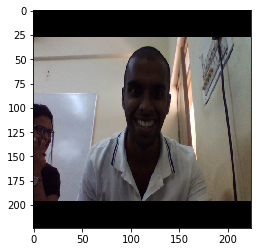

Well, somebody seems to be happy!

Here is some food for thought -

happiness is a way station between too little and too much


In [84]:
#while(1):

#step 1-
#getting the face classification model predictions -
#live_feed()
input_emotion=predict_image_classes()

#step 2-
#getting the reply quote index from the model
display_line(input_emotion)
print()
print("Here is some food for thought -")
print()
reply_quote_index=map_quote(happy,motivation,input_emotion)
#reply_music_index=map_quote(happy_music,motivation_music,input_emotion)

#step 3-
#now display the quote from the CSV file
#actually make it compiled_pred, else the model has to store the happy, motivated list in the memory 
print(display_quote(reply_quote_index))

#step 4-
#play_song(reply_music_index)
play_song(input_emotion)
#now repeat this after every song gets played and quit when the user types quit

In [ ]:


6
96
,n,#have to make music classifier and then integrate images with this

In [85]:
mixer.quit()